### Import the two CSVs into your scripting environment, under the names 'users' and 'orders'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, OrderedDict
%matplotlib inline

In [2]:
# load both files

In [3]:
users = pd.read_csv('users.csv')

In [4]:
orders = pd.read_csv('orders.csv')

In [5]:
# Get shape and info data for users

In [6]:
users.shape

(10000, 5)

In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
id                      10000 non-null int64
gender                  6690 non-null object
age                     10000 non-null int64
country                 10000 non-null object
days_on_site_in_2016    10000 non-null int64
dtypes: int64(3), object(2)
memory usage: 390.7+ KB


In [8]:
# sample of data

In [9]:
users.head()

,id,gender,age,country,days_on_site_in_2016
0,1,M,21,US,1
1,2,F,46,US,10
2,3,NaN,26,US,4
3,4,NaN,54,US,7
4,5,F,34,US,38


In [10]:
orders.shape

(51738, 7)

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51738 entries, 0 to 51737
Data columns (total 7 columns):
id                   51738 non-null int64
user_id              51738 non-null int64
order_time           51738 non-null object
item_total           51738 non-null float64
shipping_cost        51738 non-null int64
discounts_applied    4300 non-null float64
payment_reject       51738 non-null bool
dtypes: bool(1), float64(2), int64(3), object(1)
memory usage: 2.4+ MB


In [12]:
orders.head()

,id,user_id,order_time,item_total,shipping_cost,discounts_applied,payment_reject
0,1,9852,2016-01-01 0:03:11,60.69,10,NaN,False
1,2,2784,2016-01-01 0:09:32,123.91,15,NaN,False
2,3,1619,2016-01-01 0:17:26,119.75,15,NaN,False
3,4,9725,2016-01-01 0:44:04,151.92,15,NaN,False
4,5,8892,2016-01-01 0:52:23,153.27,15,NaN,False


In [13]:
# We don't need column 'id'. Just the user_id
orders.drop(['id'], axis=1, inplace=True)

### What factors determine the shipping_cost amount?

In [14]:
# merge both tables

In [15]:
users_orders = pd.merge(orders, users, how='left', left_on='user_id', right_on='id')

In [16]:
users_orders.drop(['id'], axis=1, inplace=True)

In [17]:
users_orders.head()

,user_id,order_time,item_total,shipping_cost,discounts_applied,payment_reject,gender,age,country,days_on_site_in_2016
0,9852,2016-01-01 0:03:11,60.69,10,NaN,False,NaN,26,US,29
1,2784,2016-01-01 0:09:32,123.91,15,NaN,False,NaN,47,US,28
2,1619,2016-01-01 0:17:26,119.75,15,NaN,False,M,40,US,29
3,9725,2016-01-01 0:44:04,151.92,15,NaN,False,F,40,US,3
4,8892,2016-01-01 0:52:23,153.27,15,NaN,False,NaN,32,US,10


In [18]:
users_orders.shape

(51738, 10)

In [19]:
# get unique values of shipping costs

In [20]:
orders['shipping_cost'].unique()

array([10, 15, 25, 20])

In [21]:
# scatter matrix to see any obvious correlations

/Users/steventa/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=5.0, right=5.0
  'left=%s, right=%s') % (left, right))
/Users/steventa/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=5.0, top=5.0
  'bottom=%s, top=%s') % (bottom, top))


''

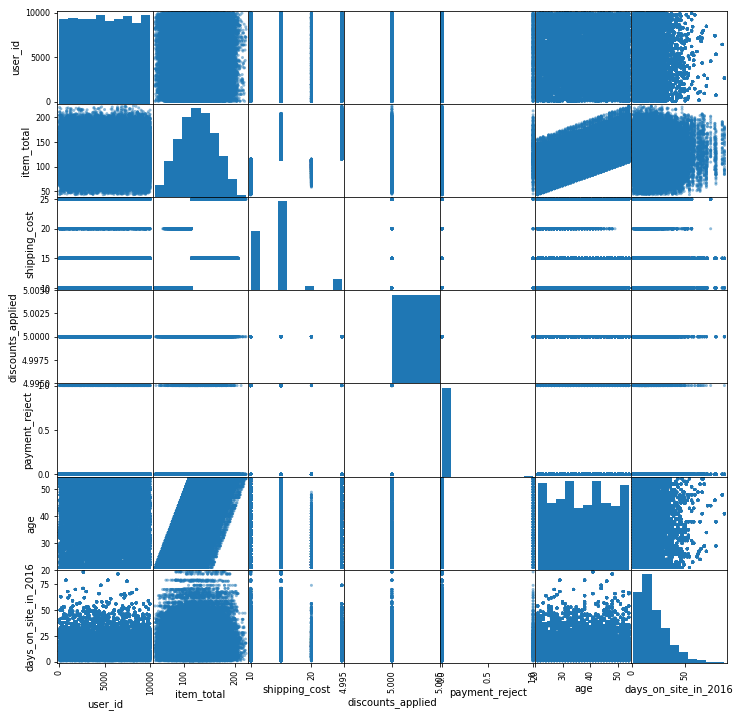

In [22]:
pd.plotting.scatter_matrix(users_orders, figsize=(12,12))
;

In [23]:
# get correlation scores

In [24]:
users_orders.corr()

,user_id,item_total,shipping_cost,discounts_applied,payment_reject,age,days_on_site_in_2016
user_id,1.000000,0.011033,0.002875,NaN,0.002579,0.006488,-0.014082
item_total,0.011033,1.000000,0.598568,NaN,0.000142,0.562673,-0.003665
shipping_cost,0.002875,0.598568,1.000000,NaN,-0.008376,0.260400,0.005374
discounts_applied,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_reject,0.002579,0.000142,-0.008376,NaN,1.000000,0.004397,0.004387
age,0.006488,0.562673,0.260400,NaN,0.004397,1.000000,-0.007627
days_on_site_in_2016,-0.014082,-0.003665,0.005374,NaN,0.004387,-0.007627,1.000000


#### shipping cost and item total have pearson correlation of ~0.6

''

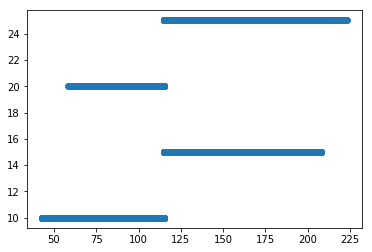

In [25]:
# plot relationship item total to shipping cost
plt.scatter(users_orders['item_total'], users_orders['shipping_cost'])
;

#### How about percent of shipping to item total?

In [26]:
# first make a column that calculates percent of cost shipping
users_orders['precent_cost_shipping'] = round(users_orders['shipping_cost'] / users_orders['item_total'],2)
# look at precent_cost_shipping column at the end
users_orders.head()

,user_id,order_time,item_total,shipping_cost,discounts_applied,payment_reject,gender,age,country,days_on_site_in_2016,precent_cost_shipping
0,9852,2016-01-01 0:03:11,60.69,10,NaN,False,NaN,26,US,29,0.16
1,2784,2016-01-01 0:09:32,123.91,15,NaN,False,NaN,47,US,28,0.12
2,1619,2016-01-01 0:17:26,119.75,15,NaN,False,M,40,US,29,0.13
3,9725,2016-01-01 0:44:04,151.92,15,NaN,False,F,40,US,3,0.10
4,8892,2016-01-01 0:52:23,153.27,15,NaN,False,NaN,32,US,10,0.10


#### Could it be just an average % for shipping costs?

In [27]:
round(users_orders['precent_cost_shipping'].mean()*100, 2)

11.48

#### It's possible the shipping cost is 12% or 10-15%. But let's try to see more relationships

In [28]:
# plot distribution of item totals

''

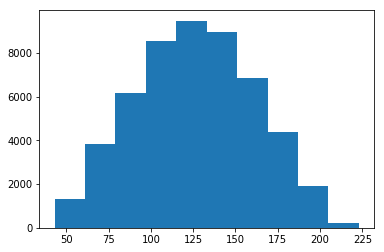

In [29]:
plt.hist(users_orders['item_total'])
;

In [30]:
# plot distribution of shipping costs

''

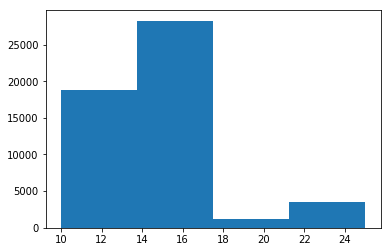

In [31]:
plt.hist(users_orders['shipping_cost'], bins=4)
;

#### Notice how each unique shipping cost lines up with our distribution of item totals. This may be calculated by range.

In [32]:
# get range of item total

In [33]:
max_item_total = users_orders['item_total'].max()
min_item_total = users_orders['item_total'].min()
range_item_total = max_item_total - min_item_total
round(range_item_total)

180.0

In [34]:
# get class size of 4

In [35]:
unique_items_size = len(users_orders['shipping_cost'].unique())
class_size = range_item_total / unique_items_size
round(class_size)

45.0

#### start with min and calculate each class until max

In [36]:
curr = int(min_item_total)
dict_of_class_ranges = OrderedDict()
sorted_shipping = sorted(users_orders['shipping_cost'].unique())

for item in sorted_shipping:
    dict_of_class_ranges[item] = (curr, curr+int(class_size))
    curr += int(class_size)
    
dict_of_class_ranges

OrderedDict([(10, (43, 87)),
             (15, (87, 131)),
             (20, (131, 175)),
             (25, (175, 219))])

### Rounded Item total : shipping cost
#### 0-100 : 10
#### 100-150 : 15
#### 150-200 : 20
#### 200+ : 25

### Freeform: Are there any trends in consumer behavior that you were able to observe?  

In [37]:
# reminder of our dataset
users_orders.head()

,user_id,order_time,item_total,shipping_cost,discounts_applied,payment_reject,gender,age,country,days_on_site_in_2016,precent_cost_shipping
0,9852,2016-01-01 0:03:11,60.69,10,NaN,False,NaN,26,US,29,0.16
1,2784,2016-01-01 0:09:32,123.91,15,NaN,False,NaN,47,US,28,0.12
2,1619,2016-01-01 0:17:26,119.75,15,NaN,False,M,40,US,29,0.13
3,9725,2016-01-01 0:44:04,151.92,15,NaN,False,F,40,US,3,0.10
4,8892,2016-01-01 0:52:23,153.27,15,NaN,False,NaN,32,US,10,0.10


### Column payment_reject offers a chance to use classification. Can we use the other features (columns) to predict the behavior of payment rejections?

In [38]:
# make a copy of our dataset since we're handling a different problem

In [39]:
payment_df = users_orders.copy()

In [40]:
payment_df.head()

,user_id,order_time,item_total,shipping_cost,discounts_applied,payment_reject,gender,age,country,days_on_site_in_2016,precent_cost_shipping
0,9852,2016-01-01 0:03:11,60.69,10,NaN,False,NaN,26,US,29,0.16
1,2784,2016-01-01 0:09:32,123.91,15,NaN,False,NaN,47,US,28,0.12
2,1619,2016-01-01 0:17:26,119.75,15,NaN,False,M,40,US,29,0.13
3,9725,2016-01-01 0:44:04,151.92,15,NaN,False,F,40,US,3,0.10
4,8892,2016-01-01 0:52:23,153.27,15,NaN,False,NaN,32,US,10,0.10


In [41]:
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51738 entries, 0 to 51737
Data columns (total 11 columns):
user_id                  51738 non-null int64
order_time               51738 non-null object
item_total               51738 non-null float64
shipping_cost            51738 non-null int64
discounts_applied        4300 non-null float64
payment_reject           51738 non-null bool
gender                   34352 non-null object
age                      51738 non-null int64
country                  51738 non-null object
days_on_site_in_2016     51738 non-null int64
precent_cost_shipping    51738 non-null float64
dtypes: bool(1), float64(3), int64(4), object(3)
memory usage: 4.4+ MB


#### Time to clean our data

In [42]:
# To classify using gender, we need to dummify them so as to make them binary choices
payment_df['gender'] = pd.get_dummies(payment_df['gender'])

In [43]:
# same for country
payment_df['country'] = pd.get_dummies(payment_df['country'])

In [44]:
# discounts_applied has lots of missing values. Replace with zeros
payment_df['discounts_applied'].fillna(value=0, inplace=True)

In [45]:
# quick look at data to check for no nulls, objects, strings
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51738 entries, 0 to 51737
Data columns (total 11 columns):
user_id                  51738 non-null int64
order_time               51738 non-null object
item_total               51738 non-null float64
shipping_cost            51738 non-null int64
discounts_applied        51738 non-null float64
payment_reject           51738 non-null bool
gender                   51738 non-null uint8
age                      51738 non-null int64
country                  51738 non-null uint8
days_on_site_in_2016     51738 non-null int64
precent_cost_shipping    51738 non-null float64
dtypes: bool(1), float64(3), int64(4), object(1), uint8(2)
memory usage: 3.7+ MB


#### Import Payment_Decline_Detection class that I built

In [46]:
from Payment_Decline_Detection import Payment_Decline_Detection

In [47]:
# data split of features and labels (what we will predict)
X = payment_df.drop(['payment_reject', 'user_id', 'order_time'], axis=1)
y = payment_df['payment_reject']

In [48]:
X.head()

,item_total,shipping_cost,discounts_applied,gender,age,country,days_on_site_in_2016,precent_cost_shipping
0,60.69,10,0.0,0,26,0,29,0.16
1,123.91,15,0.0,0,47,0,28,0.12
2,119.75,15,0.0,0,40,0,29,0.13
3,151.92,15,0.0,1,40,0,3,0.10
4,153.27,15,0.0,0,32,0,10,0.10


In [49]:
y.head()

0    False
1    False
2    False
3    False
4    False
Name: payment_reject, dtype: bool

In [50]:
# Run module. Classifier we'll use is Gradient Boosting
checker = Payment_Decline_Detection(X, y)

***** Gradient Boosting *****

tp: 0, fn: 141
fp: 77, tn: 12717

precision score: 0.0

recall score: 0.0

accuracy score: 0.983146501739





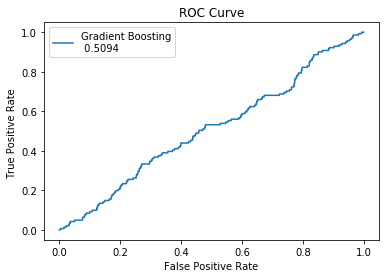

In [51]:
checker.run()

#### 0 true positives? Not good.

#### Also, our ROC curve looks terrible. This is what it should look like:

![title](roc_intro3.png)

#### Our ROC curve looks like the dotted black line. Which means our model is as good as random.

### This could be due to our True's of payment decline being such a small fraction of the overall label.

In [52]:
payment_df['payment_reject'].value_counts()

False    51225
True       513
Name: payment_reject, dtype: int64

#### True's are only 1% of our overall. A fast way to resolve this is to randomly chop down how many False's we have. 

#### undersample until the positives get up to at least 20% of entire data set

In [53]:
# get isFalse mask
isFalse = payment_df['payment_reject'] == False

In [54]:
only_false = payment_df[isFalse]

In [55]:
only_false['payment_reject'].value_counts()

False    51225
Name: payment_reject, dtype: int64

In [56]:
# get sample
only_false_cut = only_false.sample(frac=.05, random_state=240)

In [57]:
# get isTrue mask
isTrue = payment_df['payment_reject'] == True

In [58]:
only_true = payment_df[isTrue]

In [59]:
only_true['payment_reject'].value_counts()

True    513
Name: payment_reject, dtype: int64

#### combine both tables of chopped False's and all of True's

In [60]:
payment_df_final = pd.concat([only_false_cut, only_true])

In [61]:
payment_df_final.head()

,user_id,order_time,item_total,shipping_cost,discounts_applied,payment_reject,gender,age,country,days_on_site_in_2016,precent_cost_shipping
40710,9178,2016-10-15 14:36:25,79.05,10,0.0,False,0,36,0,15,0.13
45591,7459,2016-11-18 19:11:55,140.16,15,0.0,False,0,41,0,17,0.11
49495,7321,2016-12-16 1:41:16,126.94,25,0.0,False,0,48,1,2,0.20
7729,1511,2016-02-25 5:26:41,100.74,10,0.0,False,0,32,0,29,0.10
47133,5666,2016-11-29 16:52:59,150.06,15,0.0,False,0,50,0,24,0.10


In [62]:
# recount our values
payment_df_final['payment_reject'].value_counts()

False    2561
True      513
Name: payment_reject, dtype: int64

In [63]:
# got 20%
(513 / 2561)* 100

20.031237797735262

In [64]:
payment_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3074 entries, 40710 to 51713
Data columns (total 11 columns):
user_id                  3074 non-null int64
order_time               3074 non-null object
item_total               3074 non-null float64
shipping_cost            3074 non-null int64
discounts_applied        3074 non-null float64
payment_reject           3074 non-null bool
gender                   3074 non-null uint8
age                      3074 non-null int64
country                  3074 non-null uint8
days_on_site_in_2016     3074 non-null int64
precent_cost_shipping    3074 non-null float64
dtypes: bool(1), float64(3), int64(4), object(1), uint8(2)
memory usage: 225.1+ KB


#### Now we're ready to retrain our model using our new data set

In [65]:
X1 = payment_df_final.drop(['payment_reject', 'order_time', 'user_id'], axis=1)
y1 = payment_df_final['payment_reject']

In [66]:
X1.shape

(3074, 8)

In [67]:
y1.shape

(3074,)

In [68]:
checker1 = Payment_Decline_Detection(X1, y1)

***** Gradient Boosting *****

tp: 10, fn: 123
fp: 44, tn: 592

precision score: 0.185185185185

recall score: 0.0751879699248

accuracy score: 0.782834850455





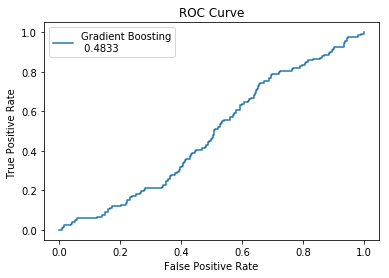

In [69]:
# run gradient boosting round 2
checker1.run()

In [70]:
# a list of our models feature importance by rank
sorted(list(zip(X1.columns, checker1.gradient_boosting.feature_importances_)), key = lambda x: x[1])[::-1]

[('item_total', 0.65400101010534772),
 ('age', 0.13853467250331211),
 ('days_on_site_in_2016', 0.13468365237262298),
 ('precent_cost_shipping', 0.03532480828836939),
 ('gender', 0.018308418091804463),
 ('discounts_applied', 0.011380181899930696),
 ('shipping_cost', 0.0047625228423081737),
 ('country', 0.0030047338963036965)]

#### We still have too many false positives. We also have a lot of false negatives. There may not be enough data / features to predict the which payments will be declined.

### Next steps:
    - explode dates out to days, hours, minutes, seconds etc to have more features
    - run a grid search to tune parameters for our gradient boost model
    - boosting our labels data set to make it bigger
    - dig into relationship of age vs item totals